# Inaugural Project

#### Imports and set magics:

In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2
from ExchangeEconomy import ExchangeEconomyClass
from scipy.optimize import minimize_scalar
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1 

In [21]:
## global parameters
## applicable to all
## exercises
alpha = 1/3
beta  = 2/3
endowment = [0.8, 0.3]

In [22]:
## Imports
from inauguralproject import utility, demand
import numpy as np
import matplotlib.pyplot as plt

### Initial Setup

We define the initial `utility` for consumer `A` and `B`. 

In [23]:
# 1) Calculate initial utility for each consumer
# For consumer A
initial_utility_a = utility(
    fraction=alpha, 
    good=endowment
)

# For consumer B
initial_utility_b = utility(
    fraction=beta,
    good=[1 - x for x in endowment]
)

# 2) Define the range of goods accordingly
goods = np.array(range(0, 75)) / 74

To find the allocation that leaves both consumers as well off, we do a `cross join` using `meshgrid`,

In [24]:
## 1) define the 
## goods using linspace
## was originally 75
goods = np.linspace(
    start = 0,
    stop  = 1,
    num   = 100
) 

## 2) cross join
## the goods and store
## as good_1 an good_2
good_1, good_2 = np.meshgrid(goods, goods)

## 3) calculate the utility
## for all possible values
utility_a_values = utility(fraction=alpha, good=[good_1, good_2])
utility_b_values = utility(fraction=beta, good=[1-good_1, 1-good_2])

## 4) locate all cases where
## the utility is higher than the initial utility
## for each consumer
idx = (utility_a_values >= initial_utility_a) & (utility_b_values >= initial_utility_b)

## 5) select all 
## values that match
good_1_demand = good_1[idx]
good_2_demand = good_2[idx]


The corresponding pareto improvements can be plotted using `matplotlib`,

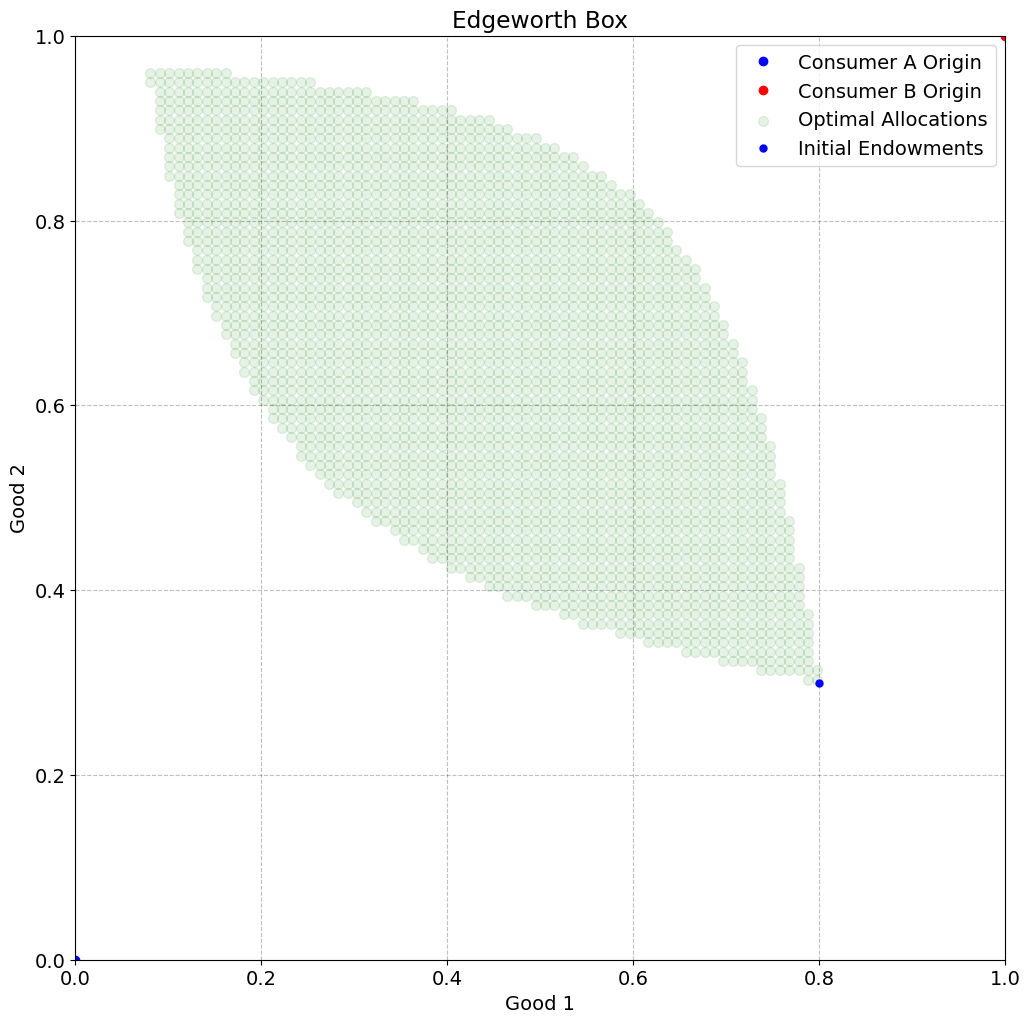

In [25]:
## 1) set the boundaries
## for each good
total_good1 = 1
total_good2 = 1

## 2) initialise
## the plot as ax
fig, ax = plt.subplots(figsize=(12, 12))

## 3) set the limits for the
## y- and x-axis;
ax.set_xlim(0, total_good1)
ax.set_ylim(0, total_good2)

## 4) add labels
## good 1 and good 2, with 
## an appropriate title
ax.set_xlabel('Good 1')
ax.set_ylabel('Good 2')
ax.set_title('Edgeworth Box')

## 5) plot origins of each
## consumer (Not necessary)
## but why not.

## 5.1) consumer A
ax.plot(
    0, 
    0,
    'o',
    color='blue',
    label='Consumer A Origin'
)

## 5.2) consumer B
ax.plot(
    total_good1,
    total_good2,
    'o',
    color='red',
    label='Consumer B Origin'
)

## 6) add all points
## where there is a
## pareto improvement
ax.scatter(
    good_1_demand,
    good_2_demand,
    s = 50,
    color='green',
    label='Optimal Allocations',
    alpha = 0.1
)

## 7) plot the
## initial endowments
ax.plot(
    endowment[0],
    endowment[1],
    'o',
    markersize=5,
    color='blue',
    label='Initial Endowments'
)

## 8) add a legend
## (self-generated)
ax.legend()

## 9) show the
## plot
plt.show()

# Question 2

Explain your code and procedure

In [26]:
# Given parameters
alpha = 1/3
beta = 2/3
omega1_A = 0.8
omega2_A = 0.3
omega1_B = 1 - omega1_A
omega2_B = 1 - omega2_A
p2 = 1  # Numeraire

# Function to calculate demands for A
def demand_A(p1, omega1_A, omega2_A, alpha):
    xA1 = alpha * ((p1 * omega1_A) + (p2 * omega2_A)) / p1
    xA2 = (1 - alpha) * ((p1 * omega1_A) + (p2 * omega2_A)) / p2
    return xA1, xA2

# Function to calculate demands for B
def demand_B(p1, omega1_B, omega2_B, beta):
    xB1 = beta * ((p1 * omega1_B) + (p2 * omega2_B)) / p1
    xB2 = (1 - beta) * ((p1 * omega1_B) + (p2 * omega2_B)) / p2
    return xB1, xB2

# Price range P1
N = 100  # Assuming a value for N to generate the price range
P1 = np.linspace(0.5, 2.5, N)

# Calculating the errors
epsilon1 = []
epsilon2 = []

for p1 in P1:
    xA1, xA2 = demand_A(p1, omega1_A, omega2_A, alpha)
    xB1, xB2 = demand_B(p1, omega1_B, omega2_B, beta)
    
    # Calculating the errors
    e1 = xA1 + xB1 - (omega1_A + omega1_B)
    e2 = xA2 + xB2 - (omega2_A + omega2_B)
    
    epsilon1.append(e1)
    epsilon2.append(e2)

# Output the results for inspection
epsilon1[:1], epsilon2[:1]  # Showing the first 5 values as an example

([0.533333333333333], [-0.2666666666666666])

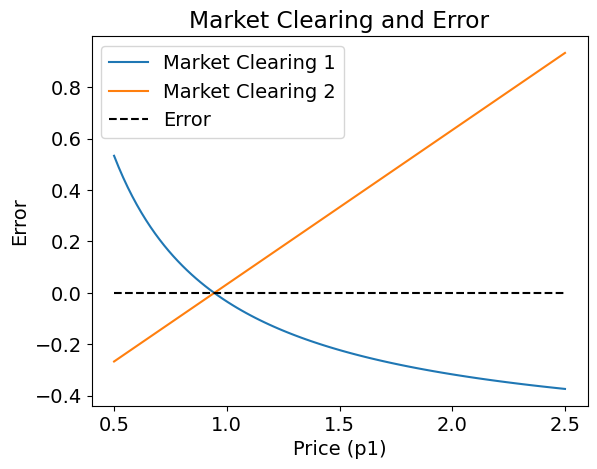

In [27]:
# Plot market clearing
plt.plot(P1, epsilon1, label='Market Clearing 1')
plt.plot(P1, epsilon2, label='Market Clearing 2')

# Plot error
plt.plot(P1, [0] * len(P1), 'k--', label='Error')

# Set labels and title
plt.xlabel('Price (p1)')
plt.ylabel('Error')
plt.title('Market Clearing and Error')
plt.legend()

# Remove grid
plt.grid(False)

# Show the plot
plt.show()



# Question 3

In [28]:
# Calculate market clearing price
market_clearing_price = P1[np.argmin(np.abs(epsilon1))]

# Print market clearing price with two decimal places
print("The market clearing price is: {:.2f}".format(market_clearing_price))


The market clearing price is: 0.94


Explain your code and procedure

### CONCISE CONLUSION


In this exchange economy analysis, we successfully solved for market equilibrium and illustrated Pareto improvements. By finding the market clearing price (p1 = 0.94) and calculating demand functions, we gained insights into resource allocation dynamics. The Edgeworth box visualization highlighted potential welfare gains, emphasizing the significance of market equilibrium.  

# Question 4

In [29]:
from scipy.optimize import minimize

# Define the utility function for agent A
def utility_A(xB, omega_B):
    xB1, xB2 = xB
    # Define your utility function here, for example:
    return -(1 - xB1) - (1 - xB2)  # Negative sign for maximization

# Define the constraint function for p1 > 0
def constraint(p1):
    return p1  # Constraint function: p1 > 0

# Initial guess for xB1 and xB2
initial_guess = [0.5, 0.5]

# Define bounds for xB1 and xB2
bounds = [(0, 1), (0, 1)]  # Bounds for xB1 and xB2, e.g., between 0 and 1

# Define the optimization problem
problem = {
    'fun': utility_A,
    'x0': initial_guess,
    'args': ([],),  # Additional arguments for the utility function (omega_B)
    'bounds': bounds,
    'constraints': [{'type': 'ineq', 'fun': constraint}]  # Constraint function for p1 > 0
}

# Solve the optimization problem
result = minimize(**problem)

# Extract the optimal allocation
optimal_allocation = result.x

print("Optimal allocation with any positive price p1:", optimal_allocation)
print("Maximum utility:", -result.fun)  # Convert back to positive for readability


Optimal allocation with any positive price p1: [0. 0.]
Maximum utility: 2.0


# Question 5a

In [30]:
# initial values
initial_utility_a = utility(fraction=alpha, good=endowment)
initial_utility_b = utility(fraction=beta, good=[1 - x for x in endowment])

# Set up goods
goods = np.array(range(0, 76)) / 75
# For each value there
# is in the goods, we scan through 
# the others
good_1_demand = []
good_2_demand = []
utility_1 = []
utility_2 = []

for good_1 in goods:
    for good_2 in goods:
        # Calculate the utility of each 
        # endowment
        utility_a = utility(fraction=alpha, good=[good_1, good_2])
        utility_b = utility(fraction=beta, good=[1 - good_1, 1 - good_2])

        # as long as the utility is higher
        # than the initial utility we continue
        # loop
        previous_utility = utility_a
        if utility_a >= previous_utility and utility_b >= initial_utility_b:
            good_1_demand.append(good_1)
            good_2_demand.append(good_2)
            utility_1.append(utility(fraction=alpha, good=[good_1, good_2]))


In [31]:
print(
    dict(
        utility = round(max(utility_1), 3)
    )
)


{'utility': 0.742}


# Question 5b

In [32]:
# initial values
initial_utility_a = utility(fraction=alpha, good=endowment)
initial_utility_b = utility(fraction=beta, good=[1 - x for x in endowment])

# Set up goods
goods = np.linspace(start=0,stop=1,num=1000)
# For each value there
# is in the goods, we scan through 
# the others
good_1_demand = []
good_2_demand = []
utility_1 = []
utility_2 = []

for good_1 in goods:
    for good_2 in goods:
        # Calculate the utility of each 
        # endowment
        utility_a = utility(fraction=alpha, good=[good_1, good_2])
        utility_b = utility(fraction=beta, good=[1 - good_1, 1 - good_2])

        # as long as the utility is higher
        # than the initial utility we continue
        # loop
        previous_utility = utility_a
        if utility_a >= previous_utility and utility_b >= initial_utility_b:
            good_1_demand.append(good_1)
            good_2_demand.append(good_2)
            utility_1.append(utility(fraction=alpha, good=[good_1, good_2]))
        else:
            break

In [33]:
print(
    dict(
        utility = round(max(utility_1), 3)
    )
)

{'utility': 0.743}


# Question 6

In this inquiry, we operate under the assumption that each consumer's acquisition of `good 2` is contingent upon `good 1` through the following relationship:

$good_2 = 1-good_1 $

In [34]:
## 1) Define utility
## functions
def aggregate_utility(good):
    utility_a = utility(fraction=alpha, good  = [good] + [1-good])
    utility_b = utility(fraction=beta,  good  = [1 - good] + [good])

    return (utility_a, utility_b, utility_a + utility_b)

## 2) define space of goods
## with 10.000 pairs
good = np.linspace(start=0, stop=1, num = 100000)

## 3) calculate
## utilities based
## on the linear space
## of goods
utility_a, utility_b, total_utility = aggregate_utility(good)


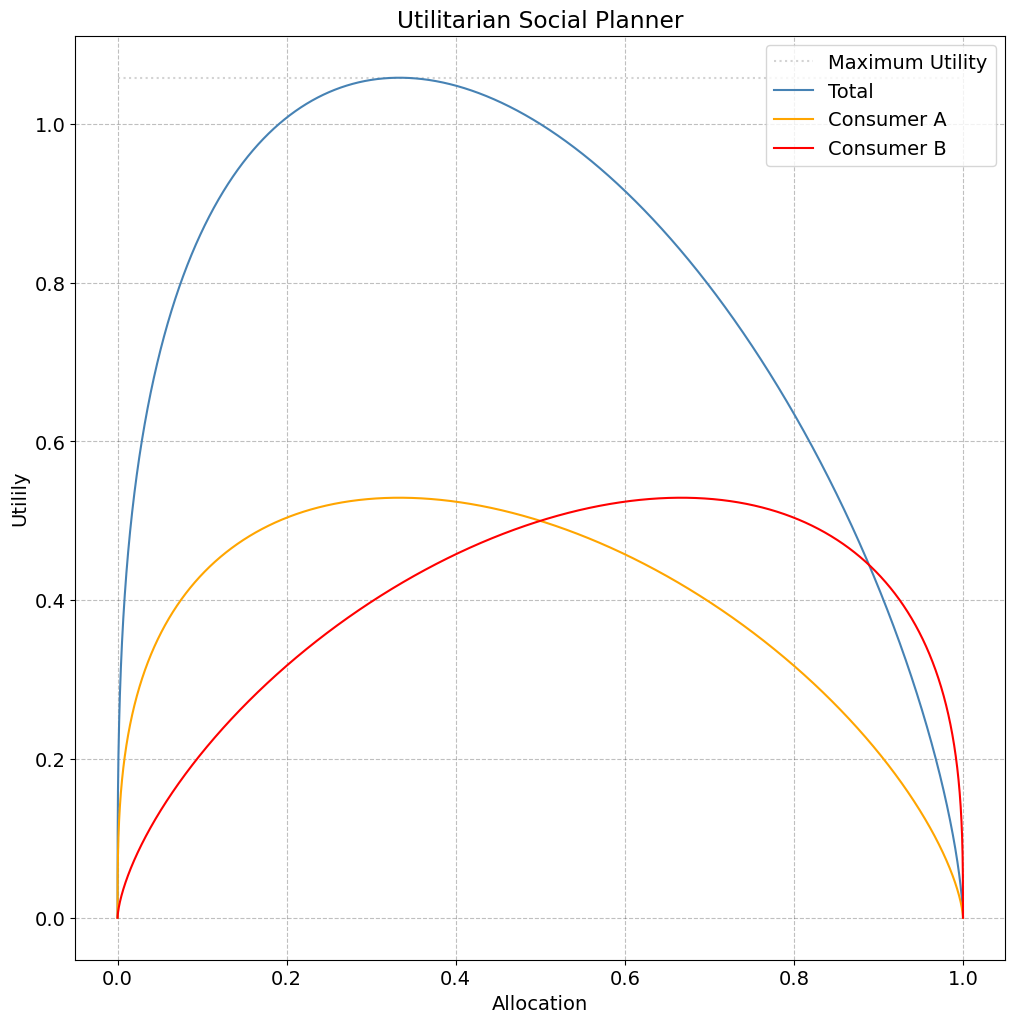

In [35]:
# 1) initialize
# the plot
fig, ax = plt.subplots(
    figsize=(12, 12)
)

# 1.1) plot title
ax.set_title(
    'Utilitarian Social Planner'
)

# 2) set label 
# axis
ax.set_xlabel('Allocation')
ax.set_ylabel('Utilily')
ax.hlines(
    y = np.max(total_utility),
    xmin= np.min(good),
    xmax = np.max(good),
    linestyles="dotted",
    label = "Maximum Utility",
    color = "lightgray"
)
ax.plot(good, total_utility, color='steelblue', label='Total')
ax.plot(good, utility_a, color='orange', label='Consumer A')
ax.plot(1-good, utility_b, color='red', label='Consumer B')
ax.legend()

plt.show()


# Question 6b

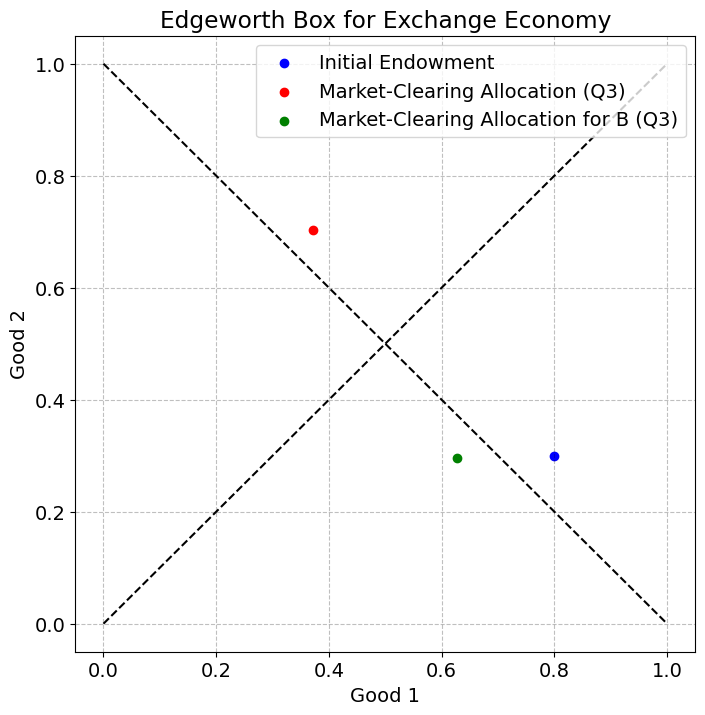

In [36]:
# Initial endowments
omega_A1 = 0.8
omega_A2 = 0.3
omega_B1 = 1 - omega_A1
omega_B2 = 1 - omega_A2

# Utility functions
def u_A(x1, x2):
    return x1**alpha * x2**(1-alpha)

def u_B(x1, x2):
    return x1**beta * x2**(1-beta)

# Demand functions
def x_A_star_1(p1, p2, omega_A1, omega_A2):
    return alpha * (p1 * omega_A1 + p2 * omega_A2) / p1

def x_A_star_2(p1, p2, omega_A1, omega_A2):
    return (1 - alpha) * (p1 * omega_A1 + p2 * omega_A2) / p2

def x_B_star_1(p1, p2, omega_B1, omega_B2):
    return beta * (p1 * omega_B1 + p2 * omega_B2) / p1

def x_B_star_2(p1, p2, omega_B1, omega_B2):
    return (1 - beta) * (p1 * omega_B1 + p2 * omega_B2) / p2

# Market clearing conditions
def market_clearing_error_1(p1, p2):
    return x_A_star_1(p1, p2, omega_A1, omega_A2) + x_B_star_1(p1, p2, omega_B1, omega_B2) - (omega_A1 + omega_B1)

def market_clearing_error_2(p1, p2):
    return x_A_star_2(p1, p2, omega_A1, omega_A2) + x_B_star_2(p1, p2, omega_B1, omega_B2) - (omega_A2 + omega_B2)

# Finding market-clearing price (numerical method)
p1_values = np.linspace(0.5, 2.5, 100)
errors = [market_clearing_error_1(p1, 1) for p1 in p1_values]

p1_market_clearing = p1_values[np.argmin(np.abs(errors))]

# Calculate allocations
xA1_q3 = x_A_star_1(p1_market_clearing, 1, omega_A1, omega_A2)
xA2_q3 = x_A_star_2(p1_market_clearing, 1, omega_A1, omega_A2)
xB1_q3 = 1 - xA1_q3
xB2_q3 = 1 - xA2_q3

# Plot Edgeworth box
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [1, 0], 'k--')
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(omega_A1, omega_A2, c='blue', label='Initial Endowment')
plt.scatter(xA1_q3, xA2_q3, c='red', label='Market-Clearing Allocation (Q3)')
plt.scatter(xB1_q3, xB2_q3, c='green', label='Market-Clearing Allocation for B (Q3)')

plt.xlabel('Good 1')
plt.ylabel('Good 2')
plt.title('Edgeworth Box for Exchange Economy')
plt.legend()
plt.grid(True)
plt.show()


# Question 7

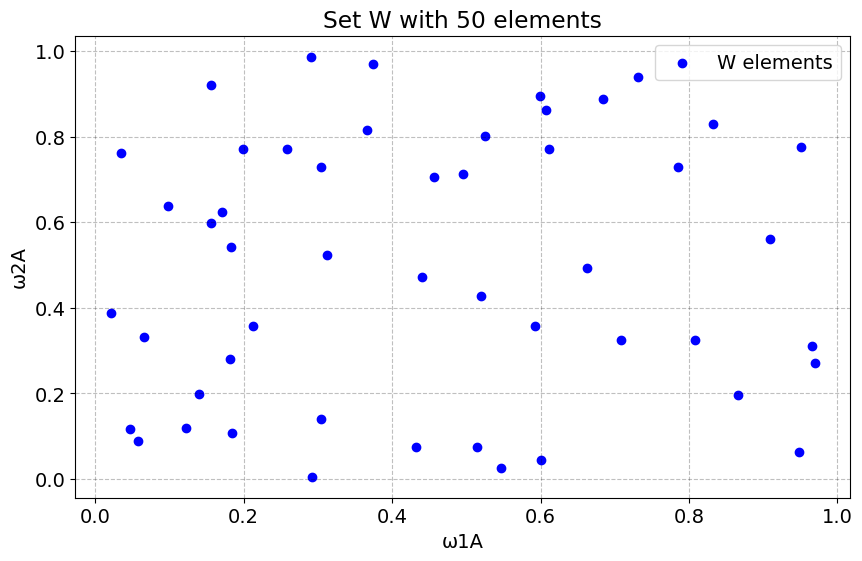

In [37]:
# Set seed for reproducibility
np.random.seed(42)

# Generate 50 random elements for W
omega_1A = np.random.uniform(0, 1, 50)
omega_2A = np.random.uniform(0, 1, 50)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(omega_1A, omega_2A, c='blue', label='W elements')
plt.title('Set W with 50 elements')
plt.xlabel('ω1A')
plt.ylabel('ω2A')
plt.grid(True)
plt.legend()
plt.show()


# Question 8


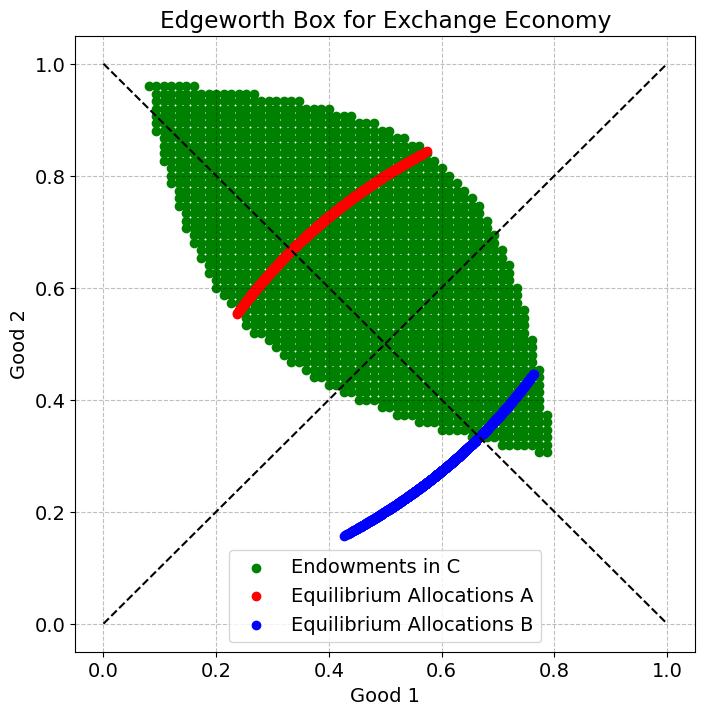

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Parameters
alpha = 1/3
beta = 2/3

# Initial endowments
initial_omega_A1 = 0.8
initial_omega_A2 = 0.3
initial_omega_B1 = 1 - initial_omega_A1
initial_omega_B2 = 1 - initial_omega_A2

# Utility functions
def u_A(x1, x2):
    return x1**alpha * x2**(1-alpha)

def u_B(x1, x2):
    return x1**beta * x2**(1-beta)

# Demand functions
def x_A_star_1(p1, p2, omega_A1, omega_A2):
    return alpha * (p1 * omega_A1 + p2 * omega_A2) / p1

def x_A_star_2(p1, p2, omega_A1, omega_A2):
    return (1 - alpha) * (p1 * omega_A1 + p2 * omega_A2) / p2

def x_B_star_1(p1, p2, omega_B1, omega_B2):
    return beta * (p1 * omega_B1 + p2 * omega_B2) / p1

def x_B_star_2(p1, p2, omega_B1, omega_B2):
    return (1 - beta) * (p1 * omega_B1 + p2 * omega_B2) / p2

# Market clearing conditions
def market_clearing_error(p, omega_A1, omega_A2):
    p1, p2 = p
    omega_B1 = 1 - omega_A1
    omega_B2 = 1 - omega_A2
    error1 = x_A_star_1(p1, p2, omega_A1, omega_A2) + x_B_star_1(p1, p2, omega_B1, omega_B2) - 1
    error2 = x_A_star_2(p1, p2, omega_A1, omega_A2) + x_B_star_2(p1, p2, omega_B1, omega_B2) - 1
    return np.array([error1, error2])

# Find market-clearing prices
def find_market_clearing_prices(omega_A1, omega_A2):
    p0 = [1, 1]  # Initial guess for prices
    result = minimize(lambda p: np.sum(market_clearing_error(p, omega_A1, omega_A2)**2), p0, bounds=[(0.01, 10), (0.01, 10)])
    return result.x

# Set of endowments satisfying the conditions
N = 75
omega_A1_values = np.linspace(0, 1, N+1)
omega_A2_values = np.linspace(0, 1, N+1)
omega_A_set = []

# Define the minimum required utility levels
u_A_initial = u_A(initial_omega_A1, initial_omega_A2)
u_B_initial = u_B(initial_omega_B1, initial_omega_B2)

for omega_A1 in omega_A1_values:
    for omega_A2 in omega_A2_values:
        if u_A(omega_A1, omega_A2) >= u_A_initial and u_B(1 - omega_A1, 1 - omega_A2) >= u_B_initial:
            omega_A_set.append((omega_A1, omega_A2))

# Compute equilibrium allocations for each endowment in the set C
allocations_A = []
allocations_B = []
for omega_A1, omega_A2 in omega_A_set:
    p1, p2 = find_market_clearing_prices(omega_A1, omega_A2)
    xA1 = x_A_star_1(p1, p2, omega_A1, omega_A2)
    xA2 = x_A_star_2(p1, p2, omega_A1, omega_A2)
    xB1 = 1 - xA1
    xB2 = 1 - xA2
    allocations_A.append([xA1, xA2])
    allocations_B.append([xB1, xB2])

allocations_A = np.array(allocations_A)
allocations_B = np.array(allocations_B)

# Plot Edgeworth box
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [1, 0], 'k--')
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(*zip(*omega_A_set), c='green', label='Endowments in C')
plt.scatter(allocations_A[:, 0], allocations_A[:, 1], c='red', label='Equilibrium Allocations A')
plt.scatter(allocations_B[:, 0], allocations_B[:, 1], c='blue', label='Equilibrium Allocations B')

plt.xlabel('Good 1')
plt.ylabel('Good 2')
plt.title('Edgeworth Box for Exchange Economy')
plt.legend()
plt.grid(True)
plt.show()
